# Music Recommendation System

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
train = pd.read_csv(r"train.csv")
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(r"train.csv")
songs = pd.read_csv(r"songs.csv")
members = pd.read_csv(r"members.csv")
train.head()

In [ ]:
train.shape

(7768, 6)

In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


# Visualization

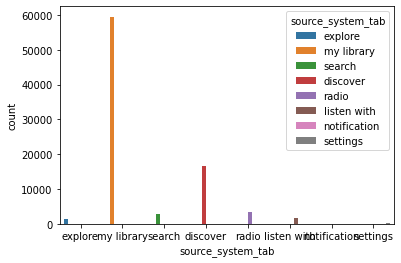

In [ ]:
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab']);

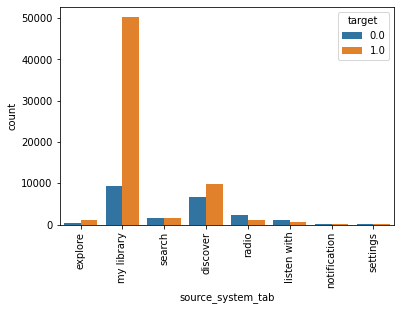

In [ ]:
sns.countplot(x = train['source_system_tab'],hue=train['target']);
plt.xticks(rotation =90)
plt.show()

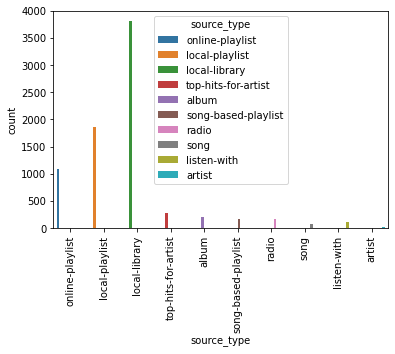

In [ ]:
sns.countplot(x = train['source_type'],hue=train['source_type'],data = train,orient='v');
plt.xticks(rotation =90)
plt.show()

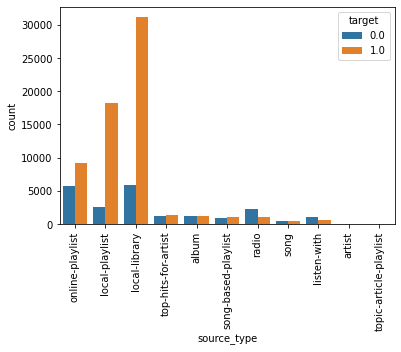

In [ ]:
sns.countplot(x = train['source_type'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

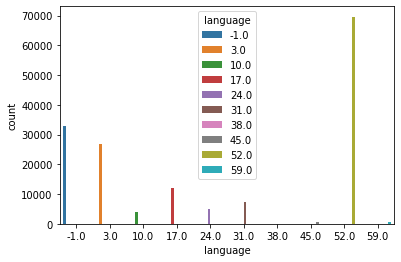

In [ ]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v');

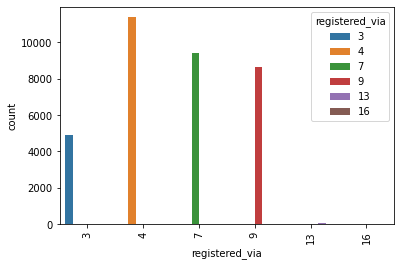

In [ ]:
sns.countplot(x = members['registered_via'],hue=members['registered_via'],orient='v')
plt.xticks(rotation =90)
plt.show()

# Preprocessing

In [ ]:
train_df=pd.merge(train,songs.drop_duplicates(['song_id']),on='song_id',how='left')
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(train_df)

7768

In [ ]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

for i in train_df.columns :
    train_df[i] = encoder.fit_transform(train_df[i])
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,1537,5456,1,6,5,1,6305,137,3160,4768,2849,10
1,3226,16361,3,7,4,1,6305,137,3160,4768,2849,10
2,3226,8846,3,7,4,1,6305,137,3160,4768,2849,10
3,3226,1681,3,7,4,1,6305,137,3160,4768,2849,10
4,1537,2426,1,6,5,1,6305,137,3160,4768,2849,10


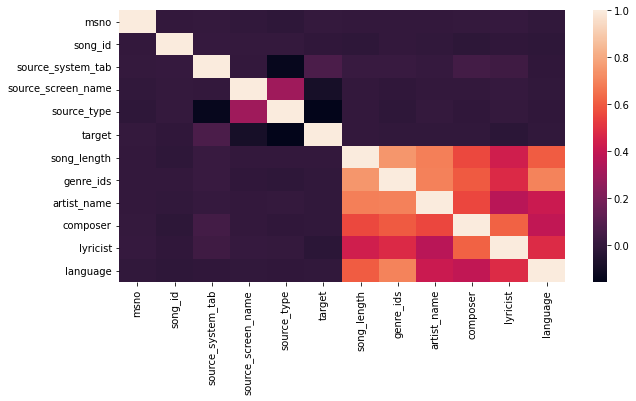

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(train_df.corr())

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X , y = train_df.drop('target' , axis=1) , train_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
randFor = RandomForestClassifier()

In [ ]:
randFor.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predict= randFor.predict(X_test)

In [ ]:

score=accuracy_score(y_test , predict)
print("Accuracy is ", score*100," %")

NameError: name 'predict' is not defined

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bdt=DecisionTreeClassifier()

In [ ]:
bdt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=bdt.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)*100
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 77.68
